# Queueing theory - M/M/1 example

#### Issues
* The arrivals followed a poisson distribution, but in this setup of the package we enter the interarrival times which follow an exponential one. We may need to look at how generic this approach will be for other types of distributions. How will that work for Erlang distributions.
* For 1 M customers the script allready becomes reasonably slow. Perhaps we should make logging optional and have a couple of key running means. Interesting to see if that will speed things up.
* Maybe we could then implement iteration until e.g. the mean of the distribution is accurately represented to lets say 0.001 or 0.0001.
* Maybe we should not allow entering of distributions, but rather steer the simulations with the Kendall codes. Just provide M/M/1 and the nr of customers should be enough for example.
* We want to have a notebook with D/D/1 but then also include quay length (to match te example of the P&W II case). This needs some additional thinking. Maybe this can be solved with length of the queue where the quay is a qeueu lenght in m and a vessel can takes several meters of queue.
* Using multiple servers seems to work, but that still needs to be thoroughly checked
* Need to make sure we can extract the same statistics from the simulation as from the analytical result to enable comparison (validation check)

### 1. Imports

In [1]:
from scipy import stats

import pandas as pd
import numpy as np

import openqtsim

import matplotlib.pyplot as plt

### 2. Prepare inputs

#### Specify the long term average IAT and ST in seconds

In [2]:
# arrivals and services
arrivals_per_hour = 8  # lambda
services_per_hour = 9  # mu

# inter arrival times and service times
aver_IAT_in_secs = 3600 / arrivals_per_hour
aver_ST_in_secs = 3600 / services_per_hour

In [3]:
print(aver_IAT_in_secs)
print(aver_ST_in_secs)

450.0
400.0


#### Define the queue object input

In [5]:
A = openqtsim.arrival_process("M", stats.expon(scale = aver_IAT_in_secs))
S = openqtsim.service_process("M", stats.expon(scale = aver_ST_in_secs))
c = 1

#### Create the queue object and use it to create a simulating object

In [6]:
# todo: enable deterministic analyses by adding a list of 'customer_name#', 'interarrival#' and 'servicetime#'
q = openqtsim.queue(A, S, c)
sim = openqtsim.simulation(q)

### 3. Run the simulation

In [7]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
sim.run(100000) # nr is the number of customers that will arrive at the server
sim.return_log(10)

Start simulation of "M/M/1/inf/inf/FIFO" queue
Wall time: 14.3 s


,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,1,678.255566,784.229034,678.255566,678.255566,1462.484600,784.229034,0.000000,678.255566,4
1,2,155.288595,194.482431,833.544161,1462.484600,1656.967031,823.422870,628.940439,0.000000,3
2,3,337.923438,461.845466,1171.467600,1656.967031,2118.812497,947.344898,485.499432,0.000000,2
3,4,33.209584,346.128976,1204.677184,2118.812497,2464.941473,1260.264289,914.135313,0.000000,1
4,5,220.808720,201.928426,1425.485904,2464.941473,2666.869899,1241.383995,1039.455569,0.000000,1
5,6,1070.247970,155.215282,2495.733874,2666.869899,2822.085181,326.351307,171.136025,0.000000,0
6,7,996.587032,170.378643,3492.320906,3492.320906,3662.699549,170.378643,0.000000,670.235725,0
7,8,331.312258,143.302490,3823.633164,3823.633164,3966.935655,143.302490,0.000000,160.933615,0
8,9,758.076155,208.138473,4581.709320,4581.709320,4789.847792,208.138473,0.000000,614.773665,0
9,10,236.263465,129.020558,4817.972785,4817.972785,4946.993343,129.020558,0.000000,28.124993,0


### 4. Analyse and visualise results

#### Get statistics

In [8]:
print('--- input statistics --------')
print("aver_IAT_in_secs: {:.2f} [seconds]".format(aver_IAT_in_secs))
print("aver_ST_in_secs: {:.2f} [seconds]".format(aver_ST_in_secs))
print('')

print('--- simulation statistics ---')
sim.get_stats()

--- input statistics --------
aver_IAT_in_secs: 450.00 [seconds]
aver_ST_in_secs: 400.00 [seconds]

--- simulation statistics ---
Average IAT: 451.24 [seconds]
Average ST: 398.04 [seconds]

Total number of customers: 100000.00
Average nr arrivals: 7.98 [# per hour]
Average nr services: 9.04 [# per hour]

Total waiting time: 320782001.84 [seconds]
Average waiting time of all customers: 3207.82 [seconds]
Average waiting time of customers that waited: 3642.39 [seconds]

Probability of idle server (nobody in the system): 0.1179
Probability that somebody is waiting: 0.8807
Probability that nobody is waiting: 0.1193
Probability that 1 person is waiting: 0.1038
Probability that 2 persons are waiting: 0.0917
Probability that 3 persons are waiting: 0.0806
Probability that 9 persons are waiting (10 in system): 0.0364

Total service time: 39804087.16 [seconds]
Average total time a customer spent in the system: 3605.86 [seconds]
Average waiting time as a fraction of ST: 8.06

System utilisation: 0

**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average waiting time in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

#### Return log

In [9]:
sim.return_log(15)
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = arrival time
# TSB = time service begins
# TSE = time service ends
# TCSS = time customer spends in the system
# TCWQ = time customer waits in the queue
# ITS = idle time of the server
# QL = queue length

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,1,678.255566,784.229034,678.255566,678.255566,1462.484600,784.229034,0.000000,678.255566,4
1,2,155.288595,194.482431,833.544161,1462.484600,1656.967031,823.422870,628.940439,0.000000,3
2,3,337.923438,461.845466,1171.467600,1656.967031,2118.812497,947.344898,485.499432,0.000000,2
3,4,33.209584,346.128976,1204.677184,2118.812497,2464.941473,1260.264289,914.135313,0.000000,1
4,5,220.808720,201.928426,1425.485904,2464.941473,2666.869899,1241.383995,1039.455569,0.000000,1
5,6,1070.247970,155.215282,2495.733874,2666.869899,2822.085181,326.351307,171.136025,0.000000,0
6,7,996.587032,170.378643,3492.320906,3492.320906,3662.699549,170.378643,0.000000,670.235725,0
7,8,331.312258,143.302490,3823.633164,3823.633164,3966.935655,143.302490,0.000000,160.933615,0
8,9,758.076155,208.138473,4581.709320,4581.709320,4789.847792,208.138473,0.000000,614.773665,0
9,10,236.263465,129.020558,4817.972785,4817.972785,4946.993343,129.020558,0.000000,28.124993,0


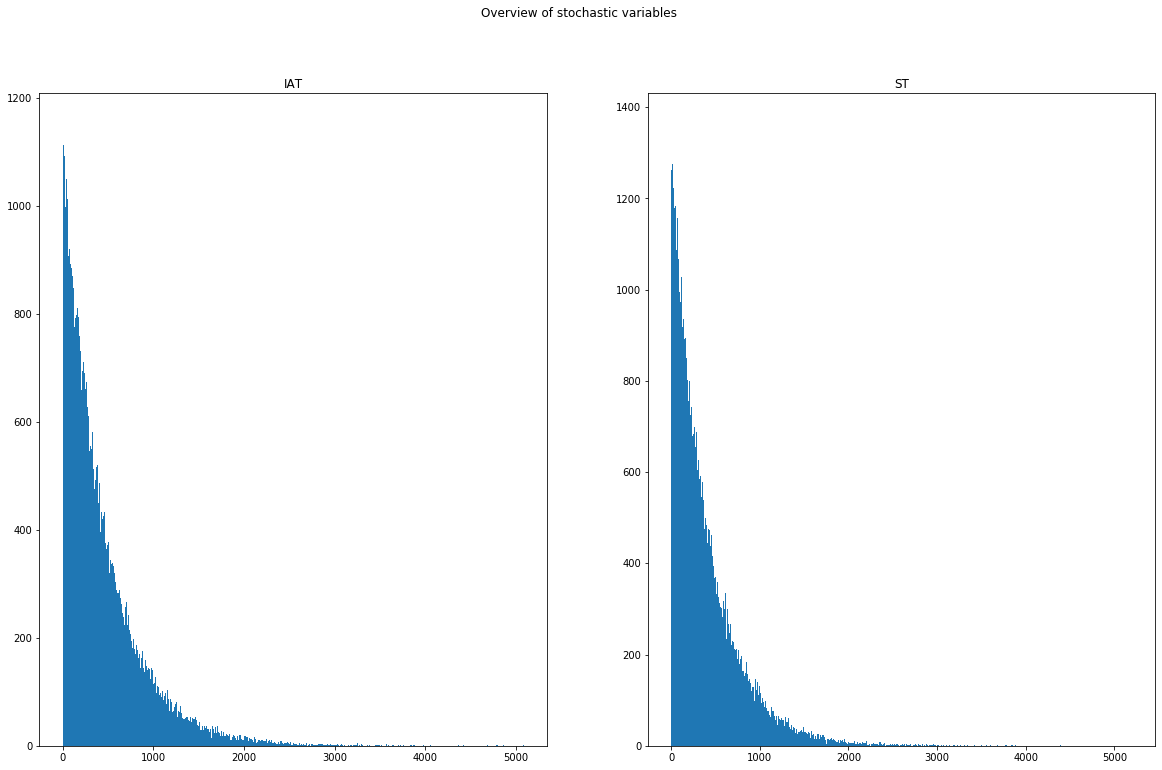

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Sandbox

In [30]:
def occupancy_to_waitingfactor(utilisation=.3, nr_of_servers_to_chk=4, poly_order=6, kendall='E2/E2/n'):
    """Waiting time factor (E2/E2/n or M/E2/n) queueing theory using 6th order polynomial regression)"""

    if kendall == 'E2/E2/n':
        # Create dataframe with data from Groenveld (2007) - Table V
        # See also PIANC 2014 Table 6.2
        utilisations = np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        nr_of_servers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        data = np.array([
            [0.0166, 0.0006, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
            [0.0604, 0.0065, 0.0011, 0.0002, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
            [0.1310, 0.0235, 0.0062, 0.0019, 0.0007, 0.0002, 0.0001, 0.0000, 0.0000, 0.0000],
            [0.2355, 0.0576, 0.0205, 0.0085, 0.0039, 0.0019, 0.0009, 0.0005, 0.0003, 0.0001],
            [0.3904, 0.1181, 0.0512, 0.0532, 0.0142, 0.0082, 0.0050, 0.0031, 0.0020, 0.0013],
            [0.6306, 0.2222, 0.1103, 0.0639, 0.0400, 0.0265, 0.0182, 0.0128, 0.0093, 0.0069],
            [1.0391, 0.4125, 0.2275, 0.1441, 0.0988, 0.0712, 0.0532, 0.0407, 0.0319, 0.0258],
            [1.8653, 0.8300, 0.4600, 0.3300, 0.2300, 0.1900, 0.1400, 0.1200, 0.0900, 0.0900],
            [4.3590, 2.0000, 1.2000, 0.9200, 0.6500, 0.5700, 0.4400, 0.4000, 0.3200, 0.3000]
        ])

    elif kendall == 'M/E2/n':
        # Create dataframe with data from Groenveld (2007) - Table IV
        # See also PIANC 2014 Table 6.1
        utilisations = np.array([.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9])
        nr_of_servers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        data = np.array([
            [0.08, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.13, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.19, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.25, 0.05, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.32, 0.08, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.40, 0.11, 0.04, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.50, 0.15, 0.06, 0.03, 0.02, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.60, 0.20, 0.08, 0.05, 0.03, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.75, 0.26, 0.12, 0.07, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00],
            [0.91, 0.33, 0.16, 0.10, 0.06, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00],
            [1.13, 0.43, 0.23, 0.14, 0.09, 0.06, 0.05, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01],
            [1.38, 0.55, 0.30, 0.19, 0.12, 0.09, 0.07, 0.05, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02],
            [1.75, 0.73, 0.42, 0.27, 0.19, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03],
            [2.22, 0.96, 0.59, 0.39, 0.28, 0.21, 0.17, 0.14, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05],
            [3.00, 1.34, 0.82, 0.57, 0.42, 0.33, 0.27, 0.22, 0.18, 0.16, 0.13, 0.11, 0.10, 0.09],
            [4.50, 2.00, 1.34, 0.90, 0.70, 0.54, 0.46, 0.39, 0.34, 0.30, 0.26, 0.23, 0.20, 0.18],
            [6.75, 3.14, 2.01, 1.45, 1.12, 0.91, 0.76, 0.65, 0.56, 0.50, 0.45, 0.40, 0.36, 0.33]
        ])

    df = pd.DataFrame(data, index=utilisations, columns=nr_of_servers)

    # Create a 6th order polynomial fit through the data (for nr_of_stations_chk)
    target = df.loc[:, nr_of_servers_to_chk]
    p_p = np.polyfit(target.index, target.values, poly_order)

    waiting_factor = np.polyval(p_p, utilisation)
    # todo: when the nr of servers > 10 the waiting factor should be set to inf (definitively more equipment needed)

    # Return waiting factor
    return waiting_factor


In [31]:
utilisations = np.array([.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9])
nr_of_servers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data = np.array([
    [0.08, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.13, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.19, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.25, 0.05, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.32, 0.08, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.40, 0.11, 0.04, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.50, 0.15, 0.06, 0.03, 0.02, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.60, 0.20, 0.08, 0.05, 0.03, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.75, 0.26, 0.12, 0.07, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00],
    [0.91, 0.33, 0.16, 0.10, 0.06, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00],
    [1.13, 0.43, 0.23, 0.14, 0.09, 0.06, 0.05, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01],
    [1.38, 0.55, 0.30, 0.19, 0.12, 0.09, 0.07, 0.05, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02],
    [1.75, 0.73, 0.42, 0.27, 0.19, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03],
    [2.22, 0.96, 0.59, 0.39, 0.28, 0.21, 0.17, 0.14, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05],
    [3.00, 1.34, 0.82, 0.57, 0.42, 0.33, 0.27, 0.22, 0.18, 0.16, 0.13, 0.11, 0.10, 0.09],
    [4.50, 2.00, 1.34, 0.90, 0.70, 0.54, 0.46, 0.39, 0.34, 0.30, 0.26, 0.23, 0.20, 0.18],
    [6.75, 3.14, 2.01, 1.45, 1.12, 0.91, 0.76, 0.65, 0.56, 0.50, 0.45, 0.40, 0.36, 0.33]
])

df = pd.DataFrame(data, index=utilisations, columns=nr_of_servers)

In [32]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0.10,0.08,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.15,0.13,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.20,0.19,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.25,0.25,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.30,0.32,0.08,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.35,0.40,0.11,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.40,0.50,0.15,0.06,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.45,0.60,0.20,0.08,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.50,0.75,0.26,0.12,0.07,0.04,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00
0.55,0.91,0.33,0.16,0.10,0.06,0.04,0.03,0.02,0.02,0.01,0.01,0.01,0.00,0.00


In [62]:
utilisation = .85
nr_of_servers_to_chk = 1
poly_order = 6

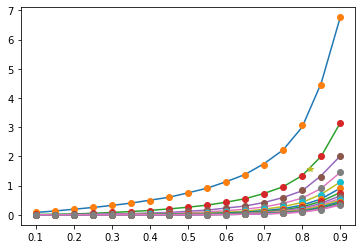

In [71]:
for j in nr_of_servers:
    # Create a 6th order polynomial fit through the data (for nr_of_stations_chk)
    target = df.loc[:, j]
    p_p = np.polyfit(target.index, target.values, poly_order)

    plt.plot(utilisations, target)
    waiting_factors = []
    for i in utilisations:
        waiting_factors.append(np.polyval(p_p, i))

    plt.plot(utilisations, waiting_factors, 'o')
plt.plot(.82, factor,'*')

In [70]:
factor = occupancy_to_waitingfactor(utilisation=.82, nr_of_servers_to_chk=2, poly_order=6, kendall='M/E2/n')

In [66]:
factor

1.3430872257370168